In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
g1 = [0]
g2 = [0]
g3 = [0]
t = [0]
tend = 1000

k_1 = 0.3
gamma_1 = 0.05
k_2 = 0.25
gamma_2 = 0.05
k_3 = 0.25
gamma_3 = 0.05

n = 8
c = 1

In [5]:
while t[-1] < tend:
    cg1 = g1[-1]
    cg2 = g2[-1]
    cg3 = g3[-1]
    
    rates = [k_1*(c**n)/(c**n + cg3**n), gamma_1*cg1,
             k_2*(cg1**n)/(c**n + cg1**n), gamma_2*cg2,
             k_3*(cg2**n)/(c**n + cg2**n), gamma_3*cg3]
    
    rate_sum = sum(rates)
    tau = np.random.exponential(scale= 1/rate_sum)
    t.append(t[-1] + tau)
    
    r = random.uniform(0,1)
    
    # production event results
    # G1 production event
    if r * rate_sum <= rates[0]:
        g1.append(g1[-1] + 1)
        g2.append(g2[-1])
        g3.append(g3[-1])

    # G1 decay event
    elif r * rate_sum > rates[0] and r * rate_sum <= sum(rates[:2]):
        g1.append(g1[-1] - 1)
        g2.append(g2[-1])
        g3.append(g3[-1])

    # G2 production event
    elif r * rate_sum > sum(rates[:2]) and r * rate_sum <= sum(rates[:3]):
        g1.append(g1[-1])
        g2.append(g2[-1] + 1)
        g3.append(g3[-1])

    # G2 decay event
    elif r * rate_sum > sum(rates[:3]) and r * rate_sum <= sum(rates[:4]):
        g1.append(g1[-1])
        g2.append(g2[-1] - 1)
        g3.append(g3[-1])

    # G3 production event
    elif r * rate_sum > sum(rates[:4]) and r * rate_sum <= sum(rates[:5]):
        g1.append(g1[-1])
        g2.append(g2[-1])
        g3.append(g3[-1] + 1)

    # G3 decay event
    elif r * rate_sum > sum(rates[:5]) and r * rate_sum <= sum(rates[:6]):
        g1.append(g1[-1])
        g2.append(g2[-1])
        g3.append(g3[-1] - 1)


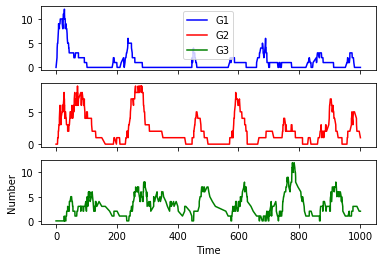

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , g1, color="b",label="G1")
line2, = ax2.plot(t , g2, color="r",label="G2")
line3, = ax3.plot(t , g3, color="g",label="G3")
plt.ylabel('Number')
plt.xlabel('Time')
ax1.legend(handles=[line1,line2,line3])
plt.show()